In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

C:\Users\bhara\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [40]:
student = pd.read_csv('C:/Users/bhara/python_codes/StudentsPerformance.csv')

In [41]:
display(student)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [51]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [42]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

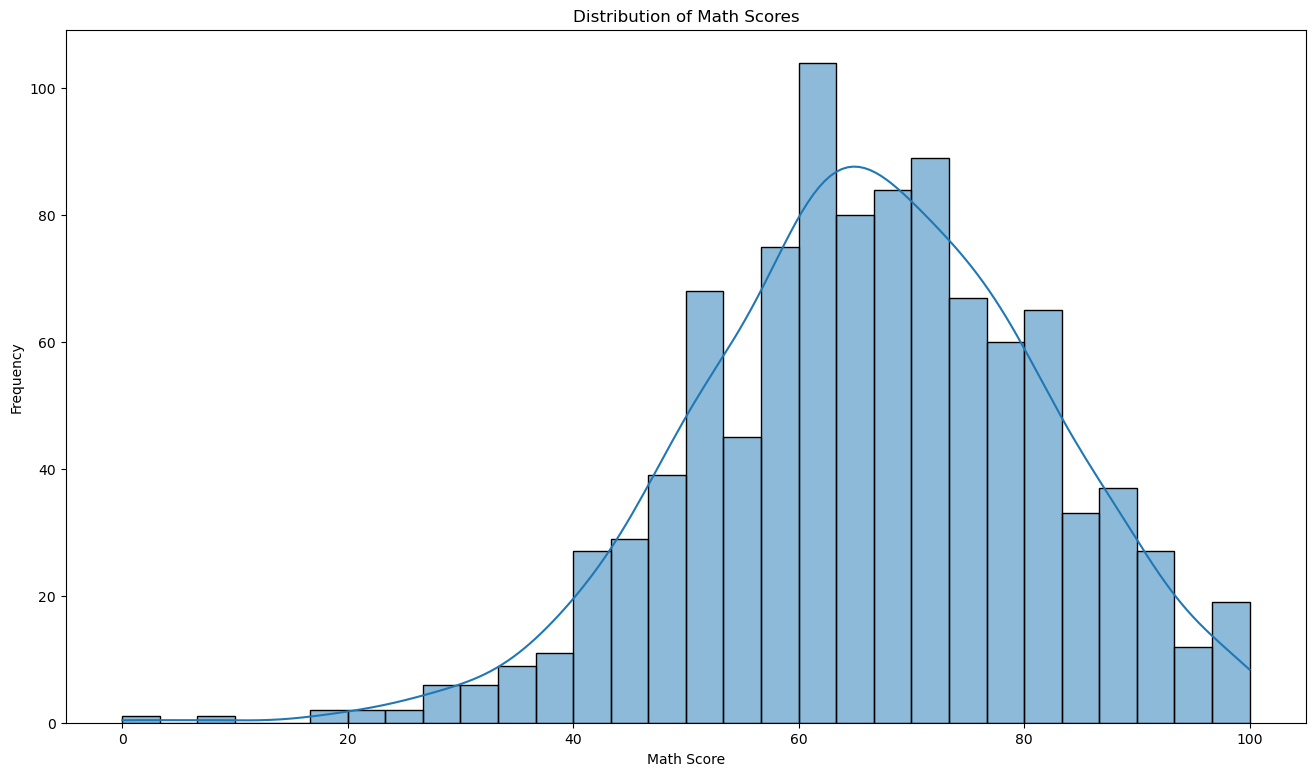

In [44]:
plt.figure(figsize=(16, 9))
sns.histplot(data=student, x="math score", bins=30, kde=True)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

In [45]:
only_scores = student[subjects]
index = pd.Index(range(0,1000,1))
student = student.set_index(index)

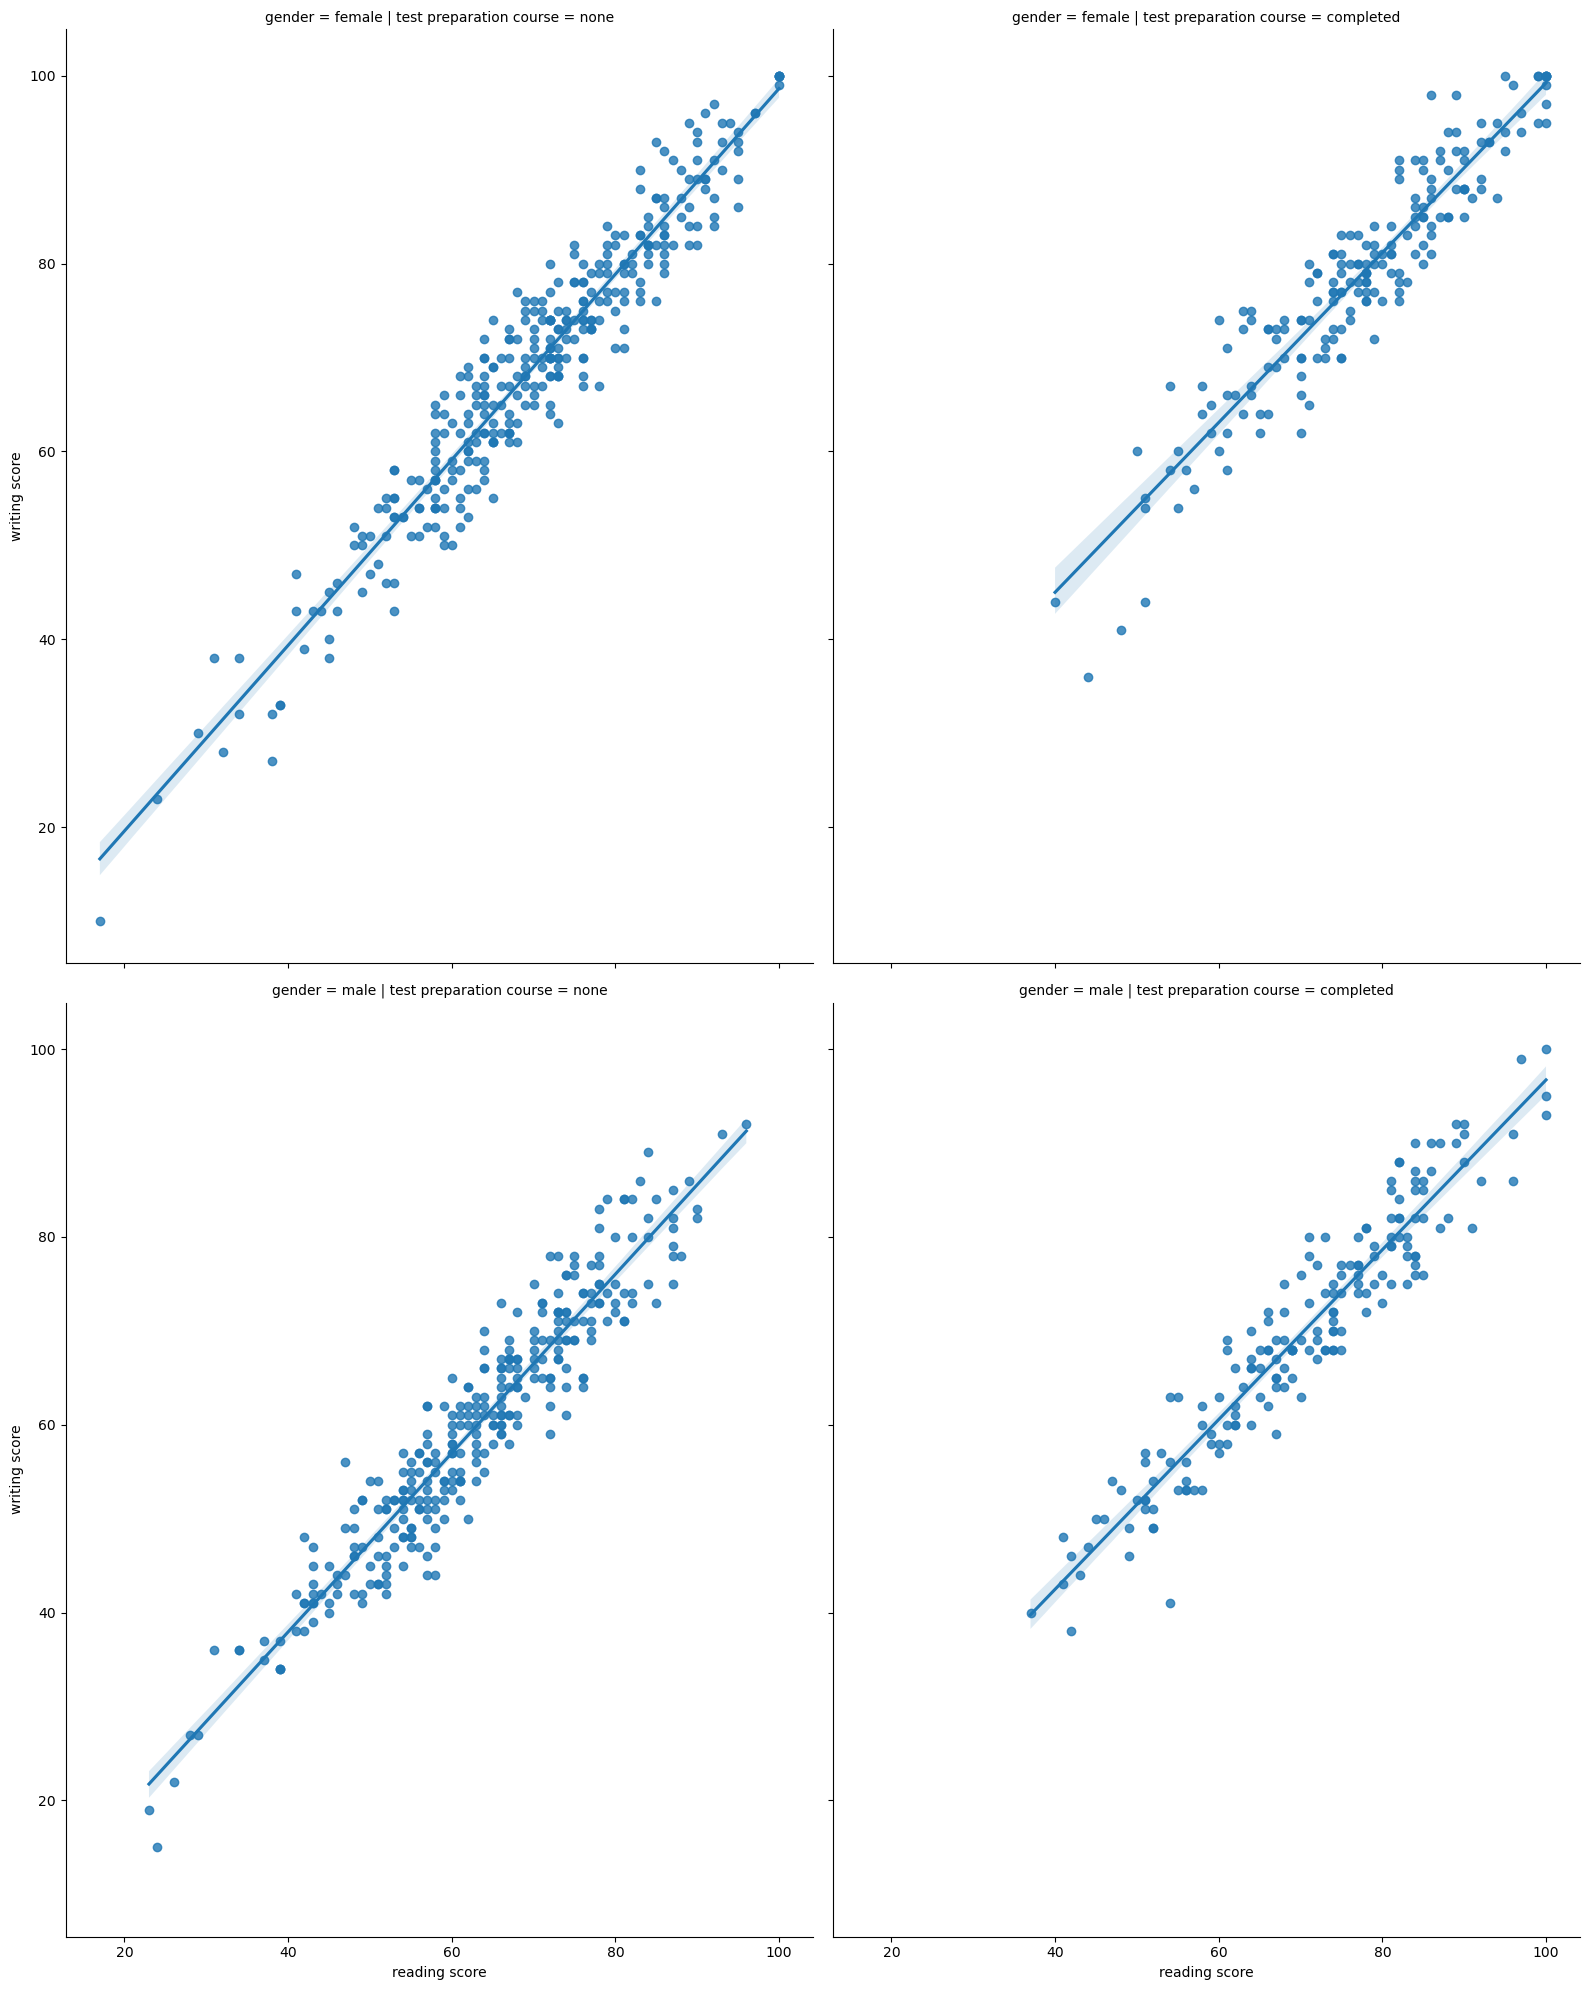

In [46]:
scores = sns.FacetGrid(data = student, col = "test preparation course",
                       row = "gender", height = 10, aspect = 0.8)
scores.map(sns.regplot, "reading score", "writing score")

C:\Users\bhara\AppData\Local\Temp\ipykernel_148000\2472676380.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,j+1)


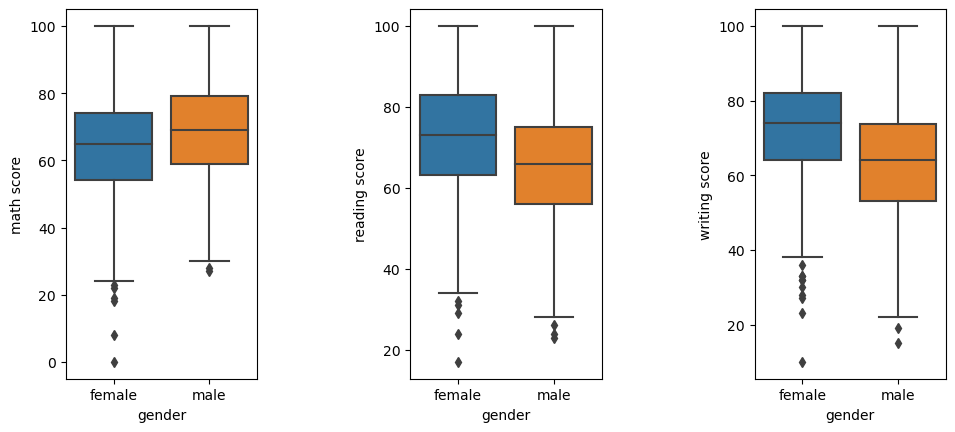

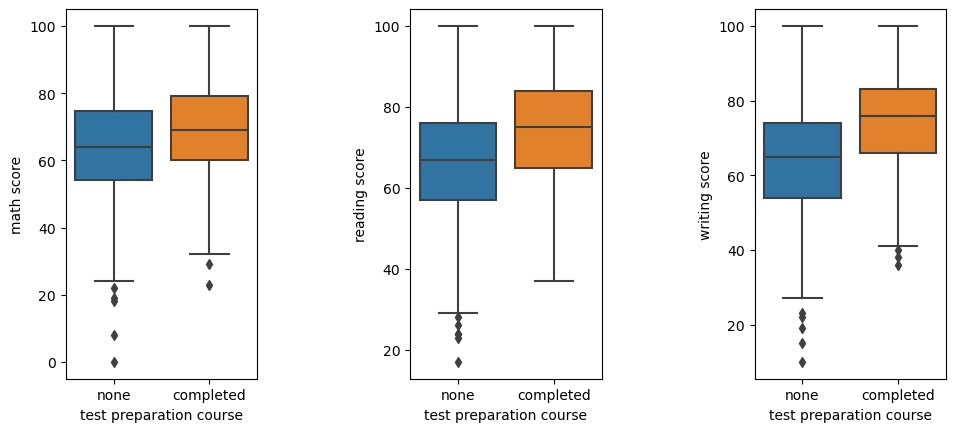

In [47]:
gen_prep_df = student.drop(columns = ["race/ethnicity", "parental level of education","lunch"])
gen_prep_df.head(10)
plt.subplots()
for i in range(2):
    for j in range(3):
        plt.subplot(1,3,j+1)
        sns.boxplot(x = gen_prep_df[list(gen_prep_df.columns[:2])[i]],
                    y = gen_prep_df[list(gen_prep_df.columns[-3:])[j]])
    plt.subplots_adjust(wspace = 0.8, right = 1.5)    
    plt.show()

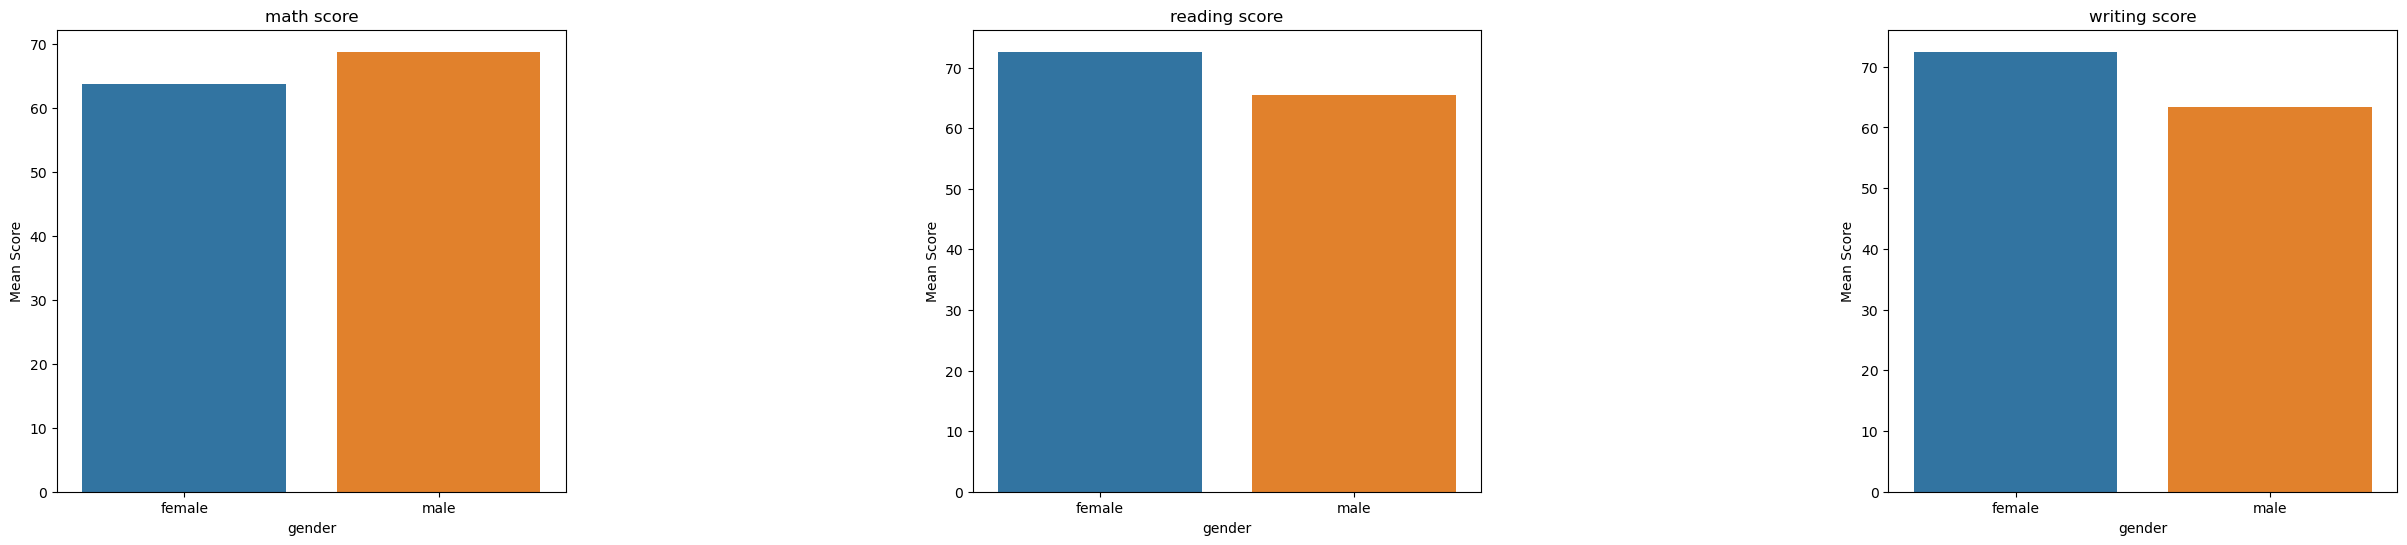

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.8, hspace=0.8, left=0.2, right=1.5)

for ax_idx, ax in enumerate(axes):
    gender_df = student.groupby(by="gender")[list(student.columns[-3:])[ax_idx]].mean()
    sns.barplot(x=gender_df.index, y=gender_df.values, ax=ax)
    
    ax.set_ylabel("Mean Score")
    ax.set_title(list(student.columns[-3:])[ax_idx])

plt.show()

C:\Users\bhara\AppData\Local\Temp\ipykernel_148000\21485250.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,ax+1)


<function matplotlib.pyplot.show(close=None, block=None)>

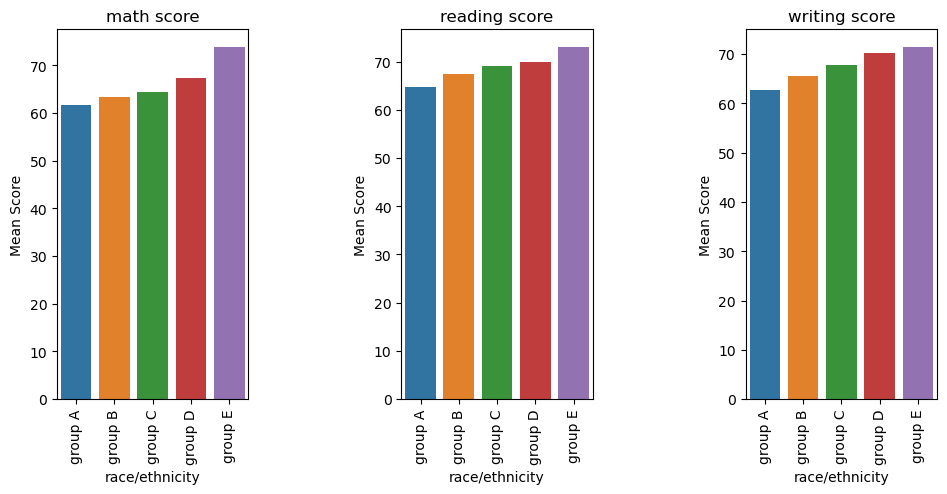

In [18]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace = 0.8, right = 1.5)
for ax in range(3):
    plt.subplot(1,3,ax+1)
    ethnicity_df = student.groupby("race/ethnicity")[list(student.columns[-3:])[ax]].mean()
    sns.barplot(x = ethnicity_df.index, y = ethnicity_df.values)
    plt.xticks(rotation = 90)
    plt.ylabel("Mean Score")
    plt.title(list(student.columns[-3:])[ax])
plt.show

C:\Users\bhara\AppData\Local\Temp\ipykernel_148000\3147381343.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,ax+1)


<function matplotlib.pyplot.show(close=None, block=None)>

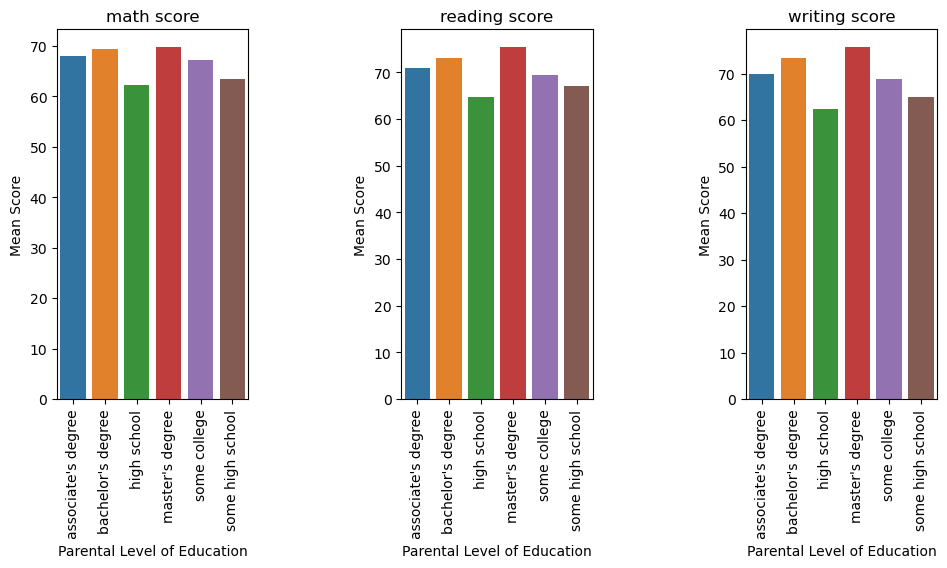

In [19]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace = 0.8, right = 1.5)
for ax in range(3):
    plt.subplot(1,3,ax+1)
    parentalEd_df = student.groupby(by = "parental level of education")[list(student.columns[-3:])[ax]].describe()
    sns.barplot(x = parentalEd_df.index, y = parentalEd_df.loc[:,"mean"].values)
    plt.ylabel("Mean Score")
    plt.xlabel("Parental Level of Education")
    plt.xticks(rotation = 90)
    plt.title(list(student.columns[-3:])[ax])
plt.show

# Hypothesis Testing

### 1. Hypothesis: There is no difference in means of student performance in reading, writing, and math


### Ho: There is no difference in performance of students between math, reading and writing skills.

### Ha: There is a difference in performance of students between math, reading and writing skills.

#### Technique used: One-way ANOVA

In [20]:
from scipy.stats import f_oneway
import pandas as pd

# Extract the relevant columns
reading_scores = student['reading score']
writing_scores = student['writing score']
math_scores = student['math score']

# Perform a one-way ANOVA
f_stat, p_value = f_oneway(reading_scores, writing_scores, math_scores)

# Print the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (0.05) to determine significance
if p_value < 0.05:
    print('There is a significant difference in means of student performance.')
else:
    print('There is no significant difference in means of student performance.')


F-statistic: 10.824191628378625
P-value: 2.0701893192229333e-05
There is a significant difference in means of student performance.


#### based on the provided results, you would reject the hypothesis that there is no difference in means of student performance in reading, writing, and math. The observed p-value is very small, indicating that the differences between the means are statistically significant.

##  Hypothesis 2: There is no relation between the gender of a student and their corresponding academic performance.

### Ho: There is no relation between the gender of a student and their corresponding academic performance.

### Ha: There is a relation between the gender of a student and their corresponding academic performance.

#### Technique used: Chi-Square Test of Independence

In [27]:
student['Overall Performance'] = student[['reading score', 'writing score', 'math score']].mean(axis=1)

# Create a new column 'Verdict' based on the 'Overall Performance' and the threshold of 40
student['Verdict'] = student['Overall Performance'].apply(lambda x: 'Acceptable' if x >= 40 else 'Not Acceptable')

# Display the updated DataFrame
display(student)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Performance,Verdict
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Acceptable
1,female,group C,some college,standard,completed,69,90,88,82.333333,Acceptable
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Acceptable
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Acceptable
4,male,group C,some college,standard,none,76,78,75,76.333333,Acceptable
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,Acceptable
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,Acceptable
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,Acceptable
998,female,group D,some college,standard,completed,68,78,77,74.333333,Acceptable


In [29]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(student['gender'], student['Verdict'],margins=True)

# Perform the Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Check if the p-value is less than the significance level (e.g., 0.05) to determine significance
if p_value < 0.05:
    print('There is a significant relationship between gender and academic performance.')
else:
    print('There is no significant relationship between gender and academic performance.')


Chi-Square Statistic: 0.029123654909683938
P-value: 0.9998950002549278
Degrees of Freedom: 4
Expected Frequencies:
[[ 502.46   15.54  518.  ]
 [ 467.54   14.46  482.  ]
 [ 970.     30.   1000.  ]]
There is no significant relationship between gender and academic performance.


#### the analysis shows that chi square value is very less and with higher observed p value it suggests that we cannot reject hypothesis. So, there is no clear association between the gender of students and their academic performance.

# Hypothesis 3: On average, students receive a respectable score of 70 or more.


### Ho: The overall performance of students is greater than or equal to a respectable score of 70.

### Ha: The overall performance of students is less than 70.

#### Technique used: One sample t-test (one sided)

In [33]:

from scipy.stats import ttest_1samp
# Extract the scores for hypothesis testing
scores = student['Overall Performance']  # Assuming you have an 'Overall Performance' column

# Perform a one-sample t-test
test_statistic, p_value = ttest_1samp(scores, 70)


print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05) to determine significance
if p_value < 0.05:
    print('There is enough evidence to reject the claim that students receive, on average, a respectable score of 70 or more.')
else:
    print('There is not enough evidence to reject the claim that students receive, on average, a respectable score of 70 or more.')


Test Statistic: -4.944665643928837
P-value: 8.942878479352004e-07
There is enough evidence to reject the claim that students receive, on average, a respectable score of 70 or more.


#### the statistical analysis provides strong support for rejecting the claim made by the educational consultant. The average student score appears to be significantly lower than the claimed respectable score of 70

# Hypothesis 4: There is no significant difference in the mean score of students who have taken test preparation and those who have not.

### Ho: There is no difference in overall performance of students between those who have taken test preparation and those who have not.

### Ha: There is a difference in overall performance of students between those who have taken test preparation and those who have not.


#### Technique used: Two sample t-test (Independent t-test)

In [35]:
from scipy.stats import ttest_ind


# Extract scores for students who have taken test preparation
prep_scores = student[student['test preparation course'] == 'completed']['Overall Performance']

# Extract scores for students who have not taken test preparation
no_prep_scores = student[student['test preparation course'] == 'none']['Overall Performance']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(prep_scores, no_prep_scores, equal_var=False)  # Assuming unequal variances

# Print the results
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05) to determine significance
if p_value < 0.05:
    print('There is enough evidence to suggest a significant difference in the mean score of students who have taken test preparation and those who have not.')
else:
    print('There is not enough evidence to suggest a significant difference in the mean score of students who have taken test preparation and those who have not.')


Test Statistic: 8.594538326688614
P-value: 4.426725271318694e-17
There is enough evidence to suggest a significant difference in the mean score of students who have taken test preparation and those who have not.


####  the statistical analysis provides strong support for the hypothesis that there is a significant difference in the mean scores between students who have taken test preparation and those who have not. The positive test statistic indicates that, on average, students who have taken test preparation tend to have higher scores.